In [1]:
import tqdm
import approximate_mutual_information
import approximate_conditional_mutual_information
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn
seaborn.set_style('ticks')

In [2]:
amis = []
tmis = []

for c in tqdm.tqdm(np.arange(0, 0.5, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    data = approximate_mutual_information.generate_gaussian_data([0, 0], cov, 3000)
    ami = approximate_mutual_information.approximated_mutual_information(data, 200)
    tmi = approximate_mutual_information.theoretical_mutual_information(cov)
    amis.append(ami)
    tmis.append(tmi)

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ytakashina\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


 20%|██        | 1/5 [00:04<00:16,  4.21s/it]

 40%|████      | 2/5 [00:06<00:11,  3.78s/it]

 60%|██████    | 3/5 [00:12<00:08,  4.30s/it]

 80%|████████  | 4/5 [00:15<00:04,  4.02s/it]

100%|██████████| 5/5 [00:19<00:00,  3.89s/it]

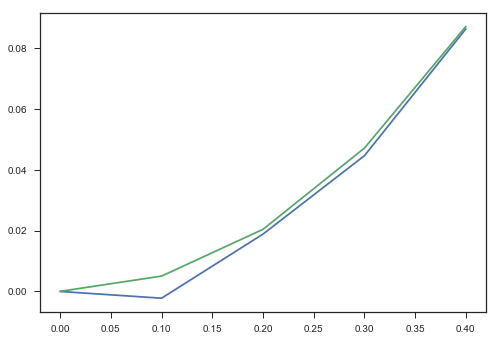

In [3]:
plt.plot(np.arange(0, 0.5, 0.1), amis)
plt.plot(np.arange(0, 0.5, 0.1), tmis)

In [23]:
n_b = 200
cov = [[1, 0.5, 0],
       [0.5, 1, 0],
       [0, 0, 1]]
pre = np.linalg.inv(cov)
print(pre)
x = scipy.stats.multivariate_normal(mean=[0, 0, 0], cov=cov).rvs(3000)

[[ 1.33333333 -0.66666667  0.        ]
 [-0.66666667  1.33333333  0.        ]
 [ 0.          0.          1.        ]]

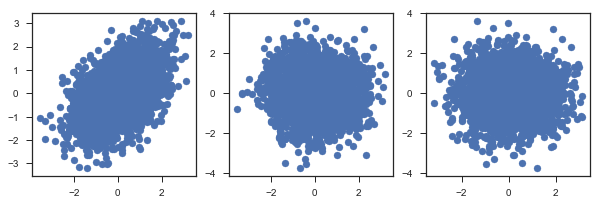

In [24]:
plt.subplots(1, 3, figsize=[10, 3])
plt.subplot(1, 3, 1)
plt.scatter(x[:, 0], x[:, 1])
plt.subplot(1, 3, 2)
plt.scatter(x[:, 0], x[:, 2])
plt.subplot(1, 3, 3)
plt.scatter(x[:, 1], x[:, 2])

In [25]:
amis = []

for _ in tqdm.tqdm(range(10)):
    ami = np.zeros([3, 3])
    for i, j in [(0, 1), (0, 2), (1, 2)]:
        ami[i, j] = approximate_conditional_mutual_information.approximated_mutual_information(x, i=i, j=j, n_b=200)
    amis.append(ami)

np.mean(amis, axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\ytakashina\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


 10%|█         | 1/10 [00:01<00:11,  1.24s/it]

 20%|██        | 2/10 [00:02<00:09,  1.25s/it]

 30%|███       | 3/10 [00:03<00:08,  1.16s/it]

 40%|████      | 4/10 [00:04<00:07,  1.18s/it]

 50%|█████     | 5/10 [00:05<00:05,  1.16s/it]

 60%|██████    | 6/10 [00:06<00:04,  1.08s/it]

 70%|███████   | 7/10 [00:07<00:03,  1.02s/it]

 80%|████████  | 8/10 [00:08<00:01,  1.03it/s]

 90%|█████████ | 9/10 [00:09<00:00,  1.07it/s]

100%|██████████| 10/10 [00:10<00:00,  1.09it/s]

array([[ 0.        ,  0.07204442,  0.1089139 ],
       [ 0.        ,  0.        ,  0.11962122],
       [ 0.        ,  0.        ,  0.        ]])

In [18]:
tmi = approximate_conditional_mutual_information.theoretical_mutual_information([[1, 0.5], [0.5, 1]])
ami = approximate_conditional_mutual_information.approximated_mutual_information(x, 0, 1, 200)
print('Theoretical Mutual Information: %f' % tmi)
print('Approximated Mutual Information: %f' % ami)

C:\Users\ytakashina\Anaconda3\lib\site-packages\scipy\optimize\slsqp.py:341: RuntimeWarning: invalid value encountered in greater
  bnderr = bnds[:, 0] > bnds[:, 1]


Theoretical Mutual Information: 0.143841

Approximated Mutual Information: 0.082620